<a href="https://colab.research.google.com/github/JustynaGoc/machine-learning-bootcamp/blob/main/Lasy_losowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(font_scale=1.3)
np.random.seed(42)

In [2]:
#zaladowanie danych
from sklearn.datasets import load_iris
raw_data = load_iris()
all_data = raw_data.copy()
data = all_data["data"]
target = all_data["target"]
feature_name = all_data["feature_names"]
target_name = all_data["target_names"]


In [3]:
df = pd.DataFrame(data =np.c_[data,target], columns=feature_name + ["target"])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
data  = data[:,[0,1]]
target = df['target'].apply(int).values

In [6]:
#las losowy

In [7]:
from sklearn.ensemble import RandomForestClassifier
classifier  = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(data,target)

RandomForestClassifier(random_state=42)

In [8]:
classifier.score(data, target)

0.9266666666666666

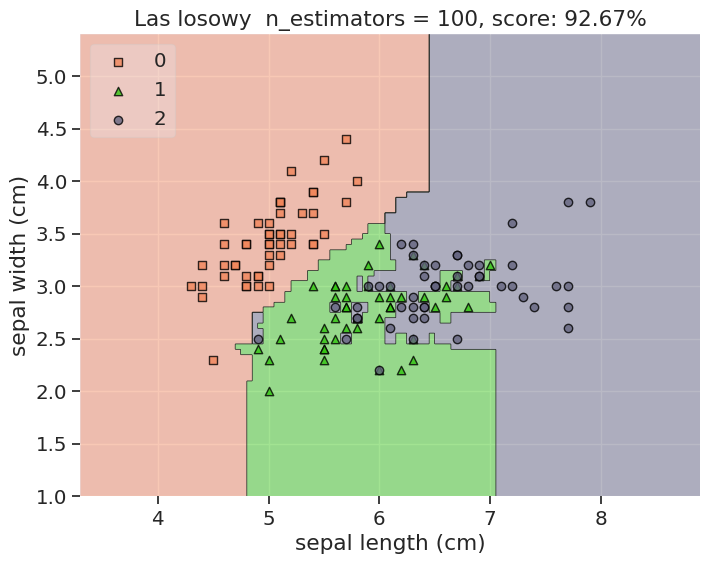

In [11]:
from mlxtend.plotting import plot_decision_regions

colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'

acc = classifier.score(data, target)

plt.figure(figsize=(8, 6))
plot_decision_regions(data, target, classifier, legend=2, colors=colors)
plt.xlabel(feature_name[0])
plt.ylabel(feature_name[1])
plt.title(f'Las losowy  n_estimators = 100, score: {acc * 100:.2f}%')
plt.show()

In [12]:
# las losowy  - wszystkei cechy

In [13]:
data = all_data["data"]
target = all_data["target"]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, ytrain = train_test_split(data, target, test_size=0.2, random_state=42)

In [15]:
X_train.shape, X_test.shape, y_train.shape, ytrain.shape


((120, 4), (30, 4), (120,), (30,))

In [22]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [23]:
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
from sklearn.metrics import accuracy_score

In [26]:
y_pred = classifier.predict(X_test)

In [28]:
accurancy_score = accuracy_score(ytrain, y_pred)
accurancy_score

1.0

In [29]:
classifier.feature_importances_

array([0.10809762, 0.03038681, 0.43999397, 0.42152159])

In [32]:
features = pd.DataFrame(data ={"feature": feature_name, "importance": classifier.feature_importances_})
px.bar(features.sort_values(by="importance"), x="feature", y="importance", width=800, height= 400)